# Pandas

**cross-section**: different categories 

**time series**: over time 

**panel data**: cross-section + time series 

**series:** column

In [1]:
import pandas as pd
import numpy as np

pd.__version__ # conda update --all

pd.set_option("display.precision", 2)

# Series

A series is a single-column of data with row labels for each observation called "indices."

In [2]:
gdp = [17514, 17876.2, 18359.4, 18813.9, 16254, 18794.4]
years = range(2015,2021)

Y = pd.Series(data=gdp, index=years, name='Real GDP')

Y

2015    17514.0
2016    17876.2
2017    18359.4
2018    18813.9
2019    16254.0
2020    18794.4
Name: Real GDP, dtype: float64

In [3]:
Y.index

RangeIndex(start=2015, stop=2021, step=1)

In [4]:
Y.values

array([17514. , 17876.2, 18359.4, 18813.9, 16254. , 18794.4])

In [5]:
Y.head() #default top 5

2015    17514.0
2016    17876.2
2017    18359.4
2018    18813.9
2019    16254.0
Name: Real GDP, dtype: float64

In [6]:
Y.tail(2) #default last 5

2019    16254.0
2020    18794.4
Name: Real GDP, dtype: float64

<AxesSubplot:>

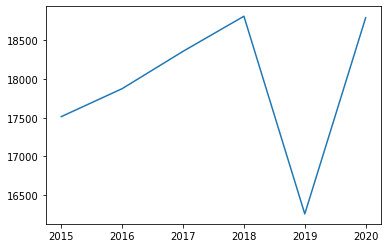

In [7]:
Y.plot()

In [8]:
Y.loc[2017]

18359.4

In [9]:
Y.loc[[2018,2020]]

2018    18813.9
2020    18794.4
Name: Real GDP, dtype: float64

In [10]:
Y.unique()

array([17514. , 17876.2, 18359.4, 18813.9, 16254. , 18794.4])

In [11]:
#exercise

from scipy.stats import norm

rng = np.random.default_rng()
daily_returns = rng.random(8)

x = pd.Series(data=daily_returns,name='daily returns')

x.reindex(['FB',"AMZN","AAPL","NFLX","GOOGL","TWTR","ACN","BNY"])

x

0    0.48
1    0.73
2    0.43
3    0.45
4    0.76
5    0.62
6    0.92
7    0.98
Name: daily returns, dtype: float64

In [12]:
data = {'Northwest': '','Midwest': '', 'South': '',"West": '',"National": ''}

rng = np.random.default_rng()

for region in list(data.keys()):
    data[region] = rng.random()

print(years)

unemp_region = pd.DataFrame(data=data,index=years,columns=data.keys())

unemp_region

range(2015, 2021)


,Northwest,Midwest,South,West,National
2015,0.87,0.73,0.05,0.2,0.17
2016,0.87,0.73,0.05,0.2,0.17
2017,0.87,0.73,0.05,0.2,0.17
2018,0.87,0.73,0.05,0.2,0.17
2019,0.87,0.73,0.05,0.2,0.17
2020,0.87,0.73,0.05,0.2,0.17


In [13]:
names = {'Northwest':'NW',"Midwest":"MW","South":"S","West":"W"}

unemp_region.rename(columns=names) #doesnt mutate original dataframe

unemp_region.head()

unemp_region.rename(columns=names,inplace=True)

unemp_region.head()

,NW,MW,S,W,National
2015,0.87,0.73,0.05,0.2,0.17
2016,0.87,0.73,0.05,0.2,0.17
2017,0.87,0.73,0.05,0.2,0.17
2018,0.87,0.73,0.05,0.2,0.17
2019,0.87,0.73,0.05,0.2,0.17


# Aggregation and transformation

In [14]:
url = "https://datascience.quantecon.org/assets/data/state_unemployment.csv"

unemp_raw = pd.read_csv(url, parse_dates=['Date'])

unemp_raw.head()

,Date,state,LaborForce,UnemploymentRate
0,2000-01-01,Alabama,2.14e+06,4.7
1,2000-01-01,Alaska,3.19e+05,6.3
2,2000-01-01,Arizona,2.50e+06,4.1
3,2000-01-01,Arkansas,1.26e+06,4.4
4,2000-01-01,California,1.67e+07,5.0


In [15]:
unemp_raw.tail()

,Date,state,LaborForce,UnemploymentRate
10795,2017-12-01,Virginia,4.32e+06,3.6
10796,2017-12-01,Washington,3.75e+06,4.7
10797,2017-12-01,West Virginia,7.82e+05,5.4
10798,2017-12-01,Wisconsin,3.16e+06,3.2
10799,2017-12-01,Wyoming,2.92e+05,4.1


In [16]:
unemp_all = (unemp_raw
             .reset_index()
             .pivot_table(index='Date',columns="state",values="UnemploymentRate"))

unemp_all.head()

state,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,Georgia,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-01,4.7,6.3,4.1,4.4,5.0,2.8,2.8,3.5,3.7,3.7,...,2.4,3.7,4.6,3.1,2.7,2.6,4.9,5.8,3.2,4.1
2000-02-01,4.7,6.3,4.1,4.3,5.0,2.8,2.7,3.6,3.7,3.6,...,2.4,3.7,4.6,3.1,2.6,2.5,4.9,5.6,3.2,3.9
2000-03-01,4.6,6.3,4.0,4.3,5.0,2.7,2.6,3.6,3.7,3.6,...,2.4,3.8,4.5,3.1,2.6,2.4,5.0,5.5,3.3,3.9
2000-04-01,4.6,6.3,4.0,4.3,5.1,2.7,2.5,3.7,3.7,3.7,...,2.4,3.8,4.4,3.1,2.7,2.4,5.0,5.4,3.4,3.8
2000-05-01,4.5,6.3,4.0,4.2,5.1,2.7,2.4,3.7,3.7,3.7,...,2.4,3.9,4.3,3.2,2.7,2.3,5.1,5.4,3.5,3.8


In [17]:
states=["Arizona","California","Florida","Illinois","Michigan","New York","Texas"]

unemp = unemp_all[states]
unemp

state,Arizona,California,Florida,Illinois,Michigan,New York,Texas
Date,,,,,,,
2000-01-01,4.1,5.0,3.7,4.2,3.3,4.7,4.6
2000-02-01,4.1,5.0,3.7,4.2,3.2,4.7,4.6
2000-03-01,4.0,5.0,3.7,4.3,3.2,4.6,4.5
2000-04-01,4.0,5.1,3.7,4.3,3.3,4.6,4.4
2000-05-01,4.0,5.1,3.7,4.3,3.5,4.6,4.3
...,...,...,...,...,...,...,...
2017-08-01,4.7,4.6,4.0,5.0,4.6,4.7,4.0
2017-09-01,4.7,4.5,3.9,5.0,4.7,4.7,4.0
2017-10-01,4.7,4.5,3.9,4.9,4.7,4.7,3.9


<AxesSubplot:xlabel='Date'>

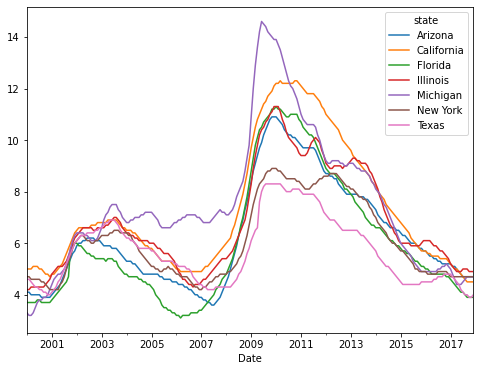

In [18]:
unemp.plot(figsize=(8,6))

In [19]:
unemp.loc['2017-12-01']

state
Arizona       4.7
California    4.5
Florida       3.9
Illinois      4.9
Michigan      4.7
New York      4.7
Texas         4.0
Name: 2017-12-01 00:00:00, dtype: float64

In [20]:
unemp.index

DatetimeIndex(['2000-01-01', '2000-02-01', '2000-03-01', '2000-04-01',
               '2000-05-01', '2000-06-01', '2000-07-01', '2000-08-01',
               '2000-09-01', '2000-10-01',
               ...
               '2017-03-01', '2017-04-01', '2017-05-01', '2017-06-01',
               '2017-07-01', '2017-08-01', '2017-09-01', '2017-10-01',
               '2017-11-01', '2017-12-01'],
              dtype='datetime64[ns]', name='Date', length=216, freq=None)

In [21]:
unemp.loc['2000']

state,Arizona,California,Florida,Illinois,Michigan,New York,Texas
Date,,,,,,,
2000-01-01,4.1,5.0,3.7,4.2,3.3,4.7,4.6
2000-02-01,4.1,5.0,3.7,4.2,3.2,4.7,4.6
2000-03-01,4.0,5.0,3.7,4.3,3.2,4.6,4.5
2000-04-01,4.0,5.1,3.7,4.3,3.3,4.6,4.4
2000-05-01,4.0,5.1,3.7,4.3,3.5,4.6,4.3
2000-06-01,4.0,5.1,3.8,4.3,3.7,4.6,4.3
2000-07-01,4.0,5.0,3.8,4.3,3.8,4.6,4.2
2000-08-01,3.9,5.0,3.7,4.3,3.8,4.5,4.2
2000-09-01,3.9,4.9,3.7,4.3,3.9,4.5,4.1


In [22]:
unemp.loc['01/01/2000':'06/01/2000']

state,Arizona,California,Florida,Illinois,Michigan,New York,Texas
Date,,,,,,,
2000-01-01,4.1,5.0,3.7,4.2,3.3,4.7,4.6
2000-02-01,4.1,5.0,3.7,4.2,3.2,4.7,4.6
2000-03-01,4.0,5.0,3.7,4.3,3.2,4.6,4.5
2000-04-01,4.0,5.1,3.7,4.3,3.3,4.6,4.4
2000-05-01,4.0,5.1,3.7,4.3,3.5,4.6,4.3
2000-06-01,4.0,5.1,3.8,4.3,3.7,4.6,4.3


# Aggregation

**Input:** series -> **Output:** single value

`agg`

In [23]:
unemp.mean() #default axis=0 (by rows)

state
Arizona       6.30
California    7.30
Florida       6.05
Illinois      6.82
Michigan      7.49
New York      6.10
Texas         5.70
dtype: float64

In [24]:
unemp.mean(axis=1) #by columns

Date
2000-01-01    4.23
2000-02-01    4.21
2000-03-01    4.19
2000-04-01    4.20
2000-05-01    4.21
              ... 
2017-08-01    4.51
2017-09-01    4.50
2017-10-01    4.47
2017-11-01    4.47
2017-12-01    4.49
Length: 216, dtype: float64

In [25]:
unemp.max()

state
Arizona       10.9
California    12.3
Florida       11.3
Illinois      11.3
Michigan      14.6
New York       8.9
Texas          8.3
dtype: float64

In [26]:
unemp.median()

state
Arizona       5.80
California    6.50
Florida       5.35
Illinois      6.15
Michigan      7.00
New York      5.70
Texas         5.40
dtype: float64

In [27]:
def high_or_low(s):
    if s.mean() < 6.5:
        return 'Low'
    else:
        return 'High'

In [28]:
unemp.agg(high_or_low)

state
Arizona        Low
California    High
Florida        Low
Illinois      High
Michigan      High
New York       Low
Texas          Low
dtype: object

In [29]:
unemp.agg([min,max,high_or_low],axis=1)

,min,max,high_or_low
Date,,,
2000-01-01,3.3,5.0,Low
2000-02-01,3.2,5.0,Low
2000-03-01,3.2,5.0,Low
2000-04-01,3.3,5.1,Low
2000-05-01,3.5,5.1,Low
...,...,...,...
2017-08-01,4.0,5.0,Low
2017-09-01,3.9,5.0,Low
2017-10-01,3.9,4.9,Low


# Transforms

**Input:** data series -> **Output:** data series

`apply`

In [30]:
def standardize_data(x):
    mu = x.mean()
    std = x.std()
    return (x - mu) / std

In [31]:
std_unemp = unemp.apply(standardize_data)

std_unemp.head()

state,Arizona,California,Florida,Illinois,Michigan,New York,Texas
Date,,,,,,,
2000-01-01,-1.08,-0.94,-0.98,-1.34,-1.61,-0.93,-0.85
2000-02-01,-1.08,-0.94,-0.98,-1.34,-1.64,-0.93,-0.85
2000-03-01,-1.13,-0.94,-0.98,-1.29,-1.64,-0.99,-0.93
2000-04-01,-1.13,-0.89,-0.98,-1.29,-1.61,-0.99,-1.00
2000-05-01,-1.13,-0.89,-0.98,-1.29,-1.53,-0.99,-1.08


In [32]:
unemp.agg(standardize_data)

state,Arizona,California,Florida,Illinois,Michigan,New York,Texas
Date,,,,,,,
2000-01-01,-1.08,-0.94,-0.98,-1.34,-1.61,-0.93,-0.85
2000-02-01,-1.08,-0.94,-0.98,-1.34,-1.64,-0.93,-0.85
2000-03-01,-1.13,-0.94,-0.98,-1.29,-1.64,-0.99,-0.93
2000-04-01,-1.13,-0.89,-0.98,-1.29,-1.61,-0.99,-1.00
2000-05-01,-1.13,-0.89,-0.98,-1.29,-1.53,-0.99,-1.08
...,...,...,...,...,...,...,...
2017-08-01,-0.78,-1.10,-0.85,-0.93,-1.11,-0.93,-1.31
2017-09-01,-0.78,-1.14,-0.89,-0.93,-1.07,-0.93,-1.31
2017-10-01,-0.78,-1.14,-0.89,-0.98,-1.07,-0.93,-1.39


In [33]:
abs_std_unemp = std_unemp.abs()

abs_std_unemp.head()

state,Arizona,California,Florida,Illinois,Michigan,New York,Texas
Date,,,,,,,
2000-01-01,1.08,0.94,0.98,1.34,1.61,0.93,0.85
2000-02-01,1.08,0.94,0.98,1.34,1.64,0.93,0.85
2000-03-01,1.13,0.94,0.98,1.29,1.64,0.99,0.93
2000-04-01,1.13,0.89,0.98,1.29,1.61,0.99,1.00
2000-05-01,1.13,0.89,0.98,1.29,1.53,0.99,1.08


In [34]:
abs_std_unemp.idxmax()

state
Arizona      2009-11-01
California   2010-03-01
Florida      2010-01-01
Illinois     2009-12-01
Michigan     2009-06-01
New York     2009-11-01
Texas        2009-08-01
dtype: datetime64[ns]

In [35]:
def high_med_low(n):
    if n > 6.5:
        return 'high'
    elif n <= 4.5:
        return 'low'
    else:
        return 'medium'

# Scalar Transforms

**Input:** scalar -> **Output:** scalar

`applymap`

In [36]:
unemp_bins = unemp.applymap(high_med_low)

unemp_bins.head()

state,Arizona,California,Florida,Illinois,Michigan,New York,Texas
Date,,,,,,,
2000-01-01,low,medium,low,low,low,medium,medium
2000-02-01,low,medium,low,low,low,medium,medium
2000-03-01,low,medium,low,low,low,medium,low
2000-04-01,low,medium,low,low,low,medium,low
2000-05-01,low,medium,low,low,low,medium,low


In [37]:
unemp_small = unemp.head()

unemp_small.loc[[True,True,True,False,False],[True,False,False,False,False,True,True]]

state,Arizona,New York,Texas
Date,,,
2000-01-01,4.1,4.7,4.6
2000-02-01,4.1,4.7,4.6
2000-03-01,4.0,4.6,4.5


In [38]:
unemp_small['Texas'] < 4.5

Date
2000-01-01    False
2000-02-01    False
2000-03-01    False
2000-04-01     True
2000-05-01     True
Name: Texas, dtype: bool

In [39]:
unemp_small.loc[unemp_small['Texas'] < 4.5]

state,Arizona,California,Florida,Illinois,Michigan,New York,Texas
Date,,,,,,,
2000-04-01,4.0,5.1,3.7,4.3,3.3,4.6,4.4
2000-05-01,4.0,5.1,3.7,4.3,3.5,4.6,4.3


In [40]:
unemp_small.loc[unemp_small['Texas'] < 4.5]['Texas']

Date
2000-04-01    4.4
2000-05-01    4.3
Name: Texas, dtype: float64

In [41]:
unemp_small["New York"] > unemp_small["Texas"]

Date
2000-01-01    True
2000-02-01    True
2000-03-01    True
2000-04-01    True
2000-05-01    True
dtype: bool

In [42]:
unemp_small.loc[unemp_small["New York"] > unemp_small["Texas"]][["Texas","New York"]]

state,Texas,New York
Date,,
2000-01-01,4.6,4.7
2000-02-01,4.6,4.7
2000-03-01,4.5,4.6
2000-04-01,4.4,4.6
2000-05-01,4.3,4.6


In [43]:
small_NYTX = (unemp_small["Texas"] < 4.7) & (unemp_small["New York"] < 4.7)

unemp_small.loc[small_NYTX]

state,Arizona,California,Florida,Illinois,Michigan,New York,Texas
Date,,,,,,,
2000-03-01,4.0,5.0,3.7,4.3,3.2,4.6,4.5
2000-04-01,4.0,5.1,3.7,4.3,3.3,4.6,4.4
2000-05-01,4.0,5.1,3.7,4.3,3.5,4.6,4.3


In [44]:
unemp_small['Michigan'].isin([3.3,3.2])

Date
2000-01-01     True
2000-02-01     True
2000-03-01     True
2000-04-01     True
2000-05-01    False
Name: Michigan, dtype: bool

In [45]:
unemp_small.loc[unemp_small['Michigan'].isin([3.3,3.2])]

state,Arizona,California,Florida,Illinois,Michigan,New York,Texas
Date,,,,,,,
2000-01-01,4.1,5.0,3.7,4.2,3.3,4.7,4.6
2000-02-01,4.1,5.0,3.7,4.2,3.2,4.7,4.6
2000-03-01,4.0,5.0,3.7,4.3,3.2,4.6,4.5
2000-04-01,4.0,5.1,3.7,4.3,3.3,4.6,4.4


In [46]:
high = unemp > 6.5

high.all(axis=1)

#unemp.loc[high.all(axis=1)]

high.all(axis=1).sum()

41

# Reading and Saving Files

Consider two different file formats:

* CSV files, stored as plained text, where each row is a line and columns are separated by commas.
* Excel files, stored in binary format.

In [47]:
unemp_small.to_csv('unemp.csv')

In [48]:
unemp_small.to_excel('unemp.xlsx','tab1')

In [49]:
file = pd.ExcelWriter("unemp.xlsx")

unemp.to_excel(file,'tab1')
unemp_small.to_excel(file,'tab2')

file.close()

In [50]:
new = pd.read_excel('unemp.xlsx','tab1',parse_dates=True,index_col=0)

In [51]:
new.head()

,Arizona,California,Florida,Illinois,Michigan,New York,Texas
Date,,,,,,,
2000-01-01,4.1,5.0,3.7,4.2,3.3,4.7,4.6
2000-02-01,4.1,5.0,3.7,4.2,3.2,4.7,4.6
2000-03-01,4.0,5.0,3.7,4.3,3.2,4.6,4.5
2000-04-01,4.0,5.1,3.7,4.3,3.3,4.6,4.4
2000-05-01,4.0,5.1,3.7,4.3,3.5,4.6,4.3


In [52]:
url = "https://fred.stlouisfed.org/graph/fredgraph.csv?bgcolor=%23e1e9f0&chart_type=line&drp=0&fo=open%20sans&graph_bgcolor=%23ffffff&height=450&mode=fred&recession_bars=on&txtcolor=%23444444&ts=12&tts=12&width=1168&nt=0&thu=0&trc=0&show_legend=yes&show_axis_titles=yes&show_tooltip=yes&id=GDP&scale=left&cosd=1947-01-01&coed=2021-10-01&line_color=%234572a7&link_values=false&line_style=solid&mark_type=none&mw=3&lw=2&ost=-99999&oet=99999&mma=0&fml=a&fq=Quarterly&fam=avg&fgst=lin&fgsnd=2020-02-01&line_index=1&transformation=lin&vintage_date=2022-04-07&revision_date=2022-04-07&nd=1947-01-01"

In [53]:
GDP = pd.read_csv(url,parse_dates=True,index_col=0)

In [54]:
GDP.head()

,GDP
DATE,
1947-01-01,243.16
1947-04-01,245.97
1947-07-01,249.59
1947-10-01,259.75
1948-01-01,265.74


In [55]:
import os

In [56]:
os.path.isfile('GDP.csv')

False

In [57]:
os.remove('GDP.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'GDP.csv'